I. Split the data into two parts. The initial 65% of the sequence is for training data and the remaining 
35% of the sequence is for test data (You may use slicing operation for the same to maintain the order of the 
sequence. Note that, you should not shuffle randomly). Plot the train and test datasets.

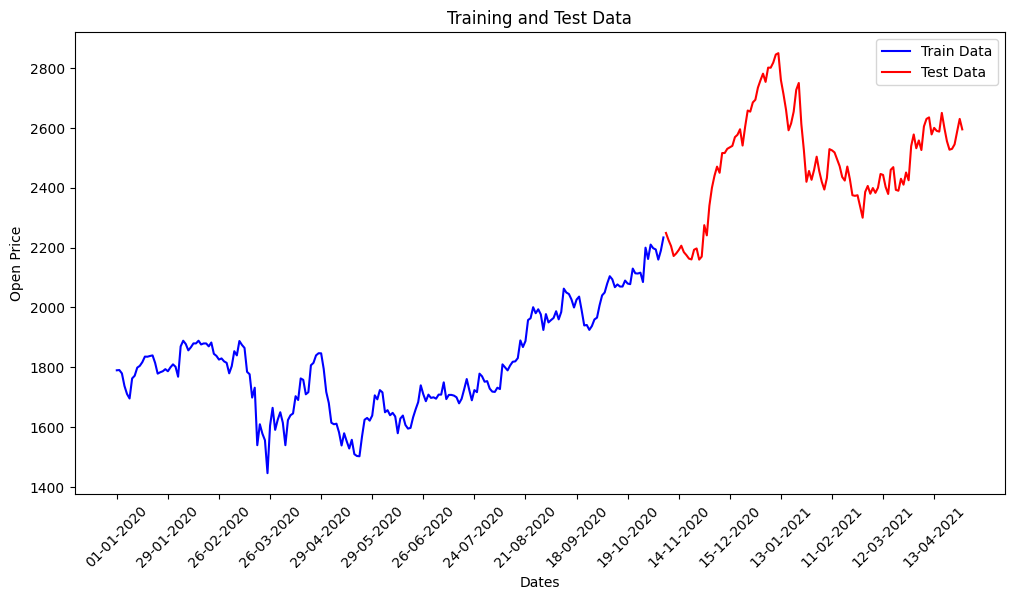

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("asianpaint.csv")

XTrain , XTest = df[:int(0.65*len(df))], df[int(0.65*len(df)):]

plt.figure(figsize=(12,6))
plt.plot(XTrain["Date"],XTrain["Open"],color='blue',label='Train Data')
plt.plot(XTest["Date"],XTest["Open"],color='red',label='Test Data')
plt.xlabel('Dates')
plt.ylabel('Open Price')
plt.title('Training and Test Data')
plt.xticks(rotation=45)
plt.xticks(np.arange(0, len(df), 20))
plt.legend()



II. Build an autoregression model with one-day lag using the train data and print the coefficients. 
Implement the method taught in the class. Do NOT use any built-in classification function.

In [2]:
XOpen = XTrain['Open'].values
XOpenMinus1 = XTrain['Open'].values[:-1] 

def calcAR(XOpenMinus1,XOpen):
    sum = 0
    meanXOpenminus1 = np.mean(XOpenMinus1)
    meanXOpen = np.mean(XOpen)
    for i in range(XOpenMinus1.shape[0]):
        sum += (XOpenMinus1[i]-meanXOpenminus1) * (XOpen[i+1]-meanXOpen)
    w = sum/np.sum(np.square(XOpenMinus1-meanXOpenminus1))
    w0 = meanXOpen - w*meanXOpenminus1

    return w,w0

w , w0 = calcAR(XOpenMinus1,XOpen)
print("W0:" , w0)
print("W:", w)

W0: 22.614222199965525
W: 0.9885847855594732


III. Make a one-step ahead prediction for the test dataset and do the following (Implement the 
method taught in the class. Do NOT use any built-in classification function): 
         i. Draw a line plot showing actual and predicted test values. 
         ii. Compute and print RMSE (%) and MAPE (%) between the actual and predicted test data.

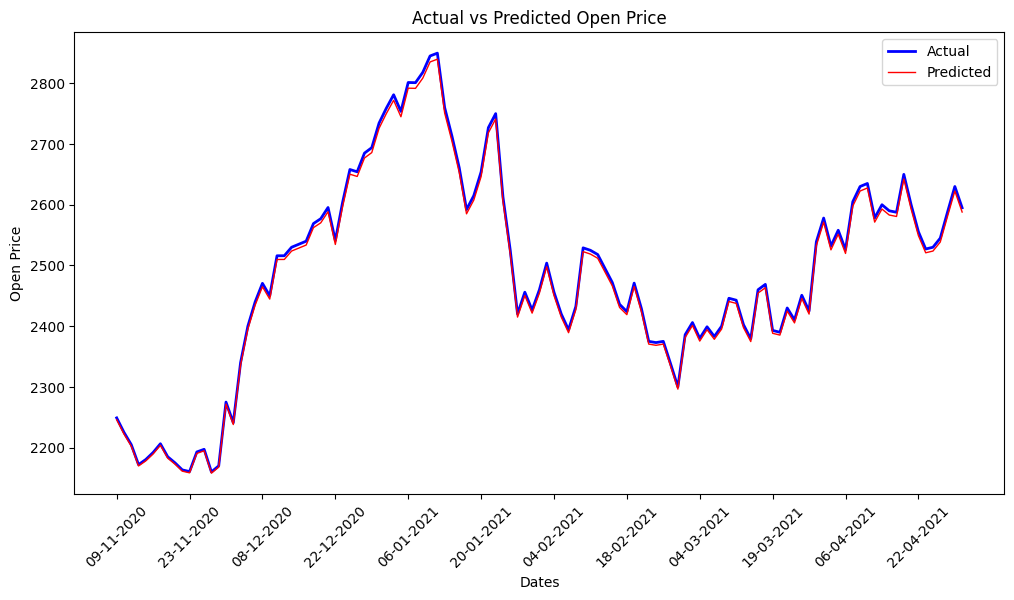

RMSE: 0.24513292193232714 %
MAPE: 0.2282575073468161 %


In [3]:
YTestOrig = XTest['Open']
Xval=XTest['Date'].values
YTestPred = YTestOrig*w + w0

plt.figure(figsize=(12, 6))
plt.plot(Xval,YTestOrig, label='Actual', color='blue', linewidth=2)
plt.plot(Xval,YTestPred, label='Predicted', color='red', linewidth=1)

plt.xlabel('Dates')
plt.ylabel('Open Price')
plt.title('Actual vs Predicted Open Price')
plt.xticks(rotation=45)
plt.xticks(np.arange(0, len(Xval), 10))
plt.legend()
plt.show()


print("RMSE:", (np.sqrt(np.mean(np.square(YTestOrig-YTestPred)))/np.mean(YTestOrig))*100,"%")
print("MAPE:", np.mean(np.abs(YTestOrig-YTestPred)/YTestOrig)*100,"%")